<a href="https://colab.research.google.com/github/victor-divo/tugas-kuliah-usm/blob/main/struktur-data/Praktikum8_Graph_G_231_22_0083.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Kelas untuk menampilkan graph
class GraphShow:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  # Method untuk menghubungkan 2 node
  def addEdge(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

  # Method untuk menampilkan graph
  def tampilkan(self):
    # Mendapatkan lokasi node menggunakan algoritma spring layout
    pos = nx.spring_layout(self.G)
    weights = nx.get_edge_attributes(self.G, "weight")

    #menambahkan node ke graph
    self.G.add_nodes_from(self.nodes)
    plt.figure()

    #Menggambar graph dengan node dan sisi yang diberikan parameter
    nx.draw(
      self.G, pos, edge_color='orange', width=3, linewidths=3,
      node_size=500, font_color='white', node_color='black', alpha=0.9,
      labels={node: node for node in self.G.nodes()}
    )
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
    plt.axis('off')
    plt.show()

  # Melakukan visualisasi graph
  def visualisasi_graph(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.tampilkan()

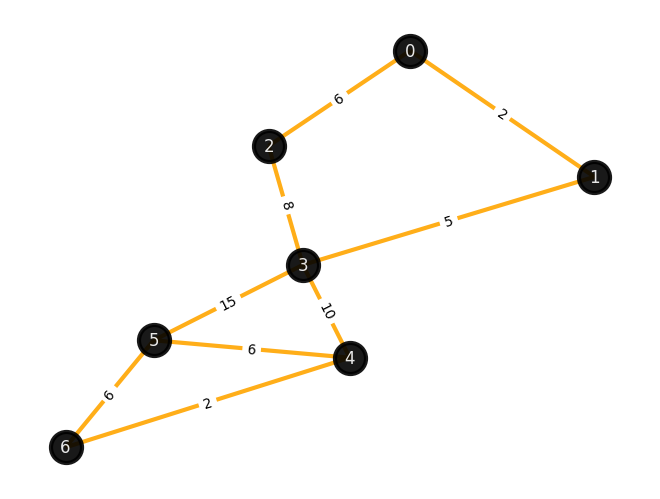

In [12]:
# Membuat graph seperti di soal C
graph = {
    '0': [{'v': '1','w': 2}, {'v': '2','w': 6}],
    '1': [{'v': '0','w': 2}, {'v': '3','w': 5}],
    '2': [{'v': '0','w': 6}, {'v': '3','w': 8}],
    '3': [{'v': '1','w': 5}, {'v': '2','w': 8}, {'v': '5','w': 15}, {'v': '4','w': 10}],
    '5': [{'v': '3','w': 15}, {'v': '4','w': 6}, {'v': '6','w': 6}],
    '4': [{'v': '3','w': 10}, {'v': '5','w': 6}, {'v': '6','w': 2}],
    '6': [{'v': '4','w': 2}, {'v': '5','w': 6}]
}

# Menampilkan visualisasi graph
C_Dijkstra_shortest_path_2 = GraphShow(graph=graph)
C_Dijkstra_shortest_path_2.visualisasi_graph()

In [14]:

# Fungsi untuk mendapatkan panjang lintasan
def get_path_weight(path):
  # inisialisasi panjang awal
  path_weight = 0
  # Melakukan penambahan panjang lintasan
  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
            path_weight += j['w']
    except:
      break

  return path_weight

# Fungsi untuk mencari jarak terpendek.
def findShortpath(graph, start, end, path =[]):
  path = path + [start]
  shortest = None
  weights = None

  if start == end: return path

  # Mencari jalur dari node.
  for node in graph[start]:
      if node['v'] not in path:
        # Menyimpan semua kemungkinan lintasan
          newpath = findShortpath(graph, node['v'], end, path)
          # Jika ada lintasan baru akan disimpan di new weight
          if newpath:
            new_weight = get_path_weight(newpath)

            # Jika tidak ada weight / new weight lebih kecil dari weights maka shortest akan diganti ke newpath dan weights akan diganti ke new_weight
            if not weights or new_weight < weights:
              shortest = newpath
              weights = new_weight
  return shortest

# Memanggil fungsi findShortpath dari titik 0 ke 6 dan mencari panjang lintasan.
lintasan_terpendek = findShortpath(graph, '0', '6')
panjang_lintasan = get_path_weight(lintasan_terpendek)

print('Lintasan Paling Pendek :', lintasan_terpendek )
print('Panjang dari lintasan adalah', panjang_lintasan)

Lintasan Paling Pendek : ['0', '1', '3', '4', '6']
Panjang dari lintasan adalah 19
